# Predict Airbnb Profit (Part 2: Modeling)

## Purpose:
The dataset is part of an [online repository](http://insideairbnb.com/index.html) to gather details on Airbnb listings and the effect of the service has on many locations around the world. There are a variety of datasets, this project will focus on the [listing details](http://data.insideairbnb.com/united-states/ca/los-angeles/2017-05-02/data/listings.csv.gz) from Los Angeles, California compiled in May 2017.

The overall purpose of this project is to predict revenue and identify the features with the the most impact to revenue.

***

### *Primary Question*

*Can we predict potential revenue based on the listing attributes?*

# Refresher

In [1]:
# Import needed libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Load the dataset
listing = pd.read_csv('cleaned_airbnb.csv')

listing= listing.drop(['Unnamed: 0'], axis=1)

# Look at the dimensions
listing.shape

(30998, 53)

In [2]:
listing.head()

,host_response_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,security_deposit_required,revenue,host_identity_verified,host_is_superhost,instant_bookable,is_location_exact,Internet,Wireless,Kitchen,Free parking,Air conditioning,TV,Pets,Heating,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Bed & Breakfast,property_type_Bungalow,property_type_Condominium,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,100.0,1.0,1.0,1,1.0,1.0,1.0,1,1,90,3,93.0,10.0,9.0,10.0,9.0,10.0,1,0.0,388.80,1.0,0.0,0.0,1.0,True,True,True,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,100.0,1.0,1.0,1,1.0,1.0,1.0,1,2,1125,0,96.0,10.0,10.0,10.0,10.0,10.0,1,0.0,2822.40,0.0,0.0,0.0,1.0,True,True,True,True,False,True,False,True,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,96.0,2.0,2.0,2,1.0,1.0,1.0,1,1,1125,38,98.0,10.0,10.0,10.0,10.0,10.0,2,0.0,25660.80,1.0,1.0,0.0,1.0,True,True,False,True,False,False,False,False,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
3,96.0,23.0,23.0,2,1.0,1.0,1.0,1,1,1125,23,89.0,9.0,8.0,9.0,8.0,9.0,19,0.0,1653.12,1.0,0.0,0.0,1.0,True,True,True,False,False,True,False,False,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
4,100.0,1.0,1.0,2,1.5,2.0,1.0,1,1,1125,0,96.0,10.0,10.0,10.0,10.0,10.0,1,0.0,28224.00,1.0,0.0,0.0,1.0,True,True,True,True,True,True,True,True,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [3]:
listing.describe()

,host_response_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,security_deposit_required,revenue,host_identity_verified,host_is_superhost,instant_bookable,is_location_exact,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Bed & Breakfast,property_type_Bungalow,property_type_Condominium,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
count,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,3.099800e+04,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,3.099800e+04,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000,30998.000000
mean,94.974514,5.198981,5.198981,3.425963,1.379476,1.348829,1.887477,1.718208,3.217950,2.085936e+05,20.923834,94.637009,9.705497,9.556778,9.824311,9.706207,9.609749,3.562972,0.540841,1.835826e+04,0.693529,0.203078,0.273114,0.793954,0.107588,0.185625,0.503291,0.010517,0.014646,0.029163,0.017904,0.405349,0.018130,0.035712,0.024292,0.369766,0.052423,0.004549,0.010033,0.006517,0.972837,0.249371,0.443803,0.000032,0.000903
std,16.078500,24.235248,24.235248,2.478397,0.826541,0.990146,1.522778,1.499637,8.193343,2.112562e+07,38.220812,7.044876,0.706604,0.867102,0.581328,0.660174,0.758604,5.570428,0.498337,3.688408e+04,0.461035,0.402296,0.445566,0.404470,0.309864,0.388810,0.499997,0.102012,0.120134,0.168266,0.132606,0.490967,0.133424,0.185574,0.153956,0.482749,0.222882,0.067291,0.099662,0.080463,0.162561,0.432656,0.496840,0.005680,0.030042
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000e+00,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,5.760000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000e+01,1.000000,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,1.000000,0.000000,3.608100e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.125000e+03,6.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,8.812800e+03,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,100.000000,4.000000,4.000000,4.000000,1.500000,2.000000,2.000000,2.000000,3.000000,1.125000e+03,23.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,1.000000,2.122200e+04,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000

# Correlations

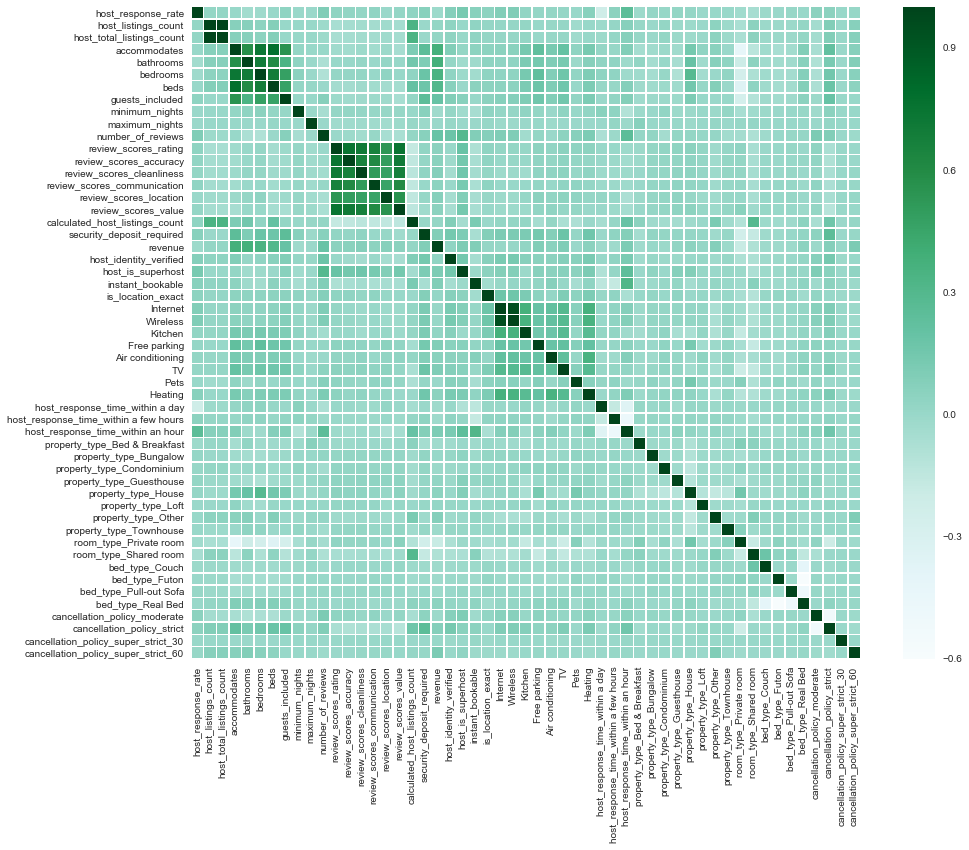

In [4]:
# Identifying correlations
corr_matrix = listing.corr()

#  Create a heatmap on the correlation of each feature to the others
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr_matrix,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values,
          cmap="BuGn",linewidths=.5)

** Bathrooms, bedrooms, and accomodates are the highest correlated to our target variable. Lets see how that plays out with the modeling **

# Baseline Models

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(listing.drop('revenue',axis=1), 
                                                    listing['revenue'], test_size=0.30, 
                                                    random_state=1234)

# Import ML libraries
from sklearn.linear_model import (LinearRegression,BayesianRidge)
from sklearn.ensemble import (RandomForestRegressor,GradientBoostingRegressor)
from sklearn.metrics import r2_score,mean_squared_error

In [6]:
# Create a function to run through many algos and score performance
def RegressionBaseline ():

    names = ['LinearRegression','BayesianRidge','RandomForestRegressor','GradientBoostingRegressor']

    classifiers = [LinearRegression(),BayesianRidge(),RandomForestRegressor(random_state=1234),
                   GradientBoostingRegressor(random_state=1234)]

    for name, clf in zip(names,classifiers):
        model = clf
        model.fit(X_train, y_train)
        
        # Make our predictions
        predict = clf.predict(X_train)

        print('Results for', name, 'Model:')
        print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_train, predict)))
        print ('R-Squared: %.2f' % r2_score(y_train, predict))

In [7]:
# Run the function
RegressionBaseline()

Results for LinearRegression Model:
RMSE: 30201.79
R-Squared: 0.27
Results for BayesianRidge Model:
RMSE: 30234.29
R-Squared: 0.27
Results for RandomForestRegressor Model:
RMSE: 12775.28
R-Squared: 0.87
Results for GradientBoostingRegressor Model:
RMSE: 24004.74
R-Squared: 0.54


** The Random Forest Regressor performed the best out-of-the-box. I will go forward using this model and look to tune the hyperparamters to minimize the RMSE and increase fit **

# Model Refinement

### Grid Search

In [8]:
# Use a grid search to tune hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

# execute the grid search
forest_reg = RandomForestRegressor(random_state=1234)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

# Final Evaluation

RMSE: 11586.57
R-Squared: 0.92


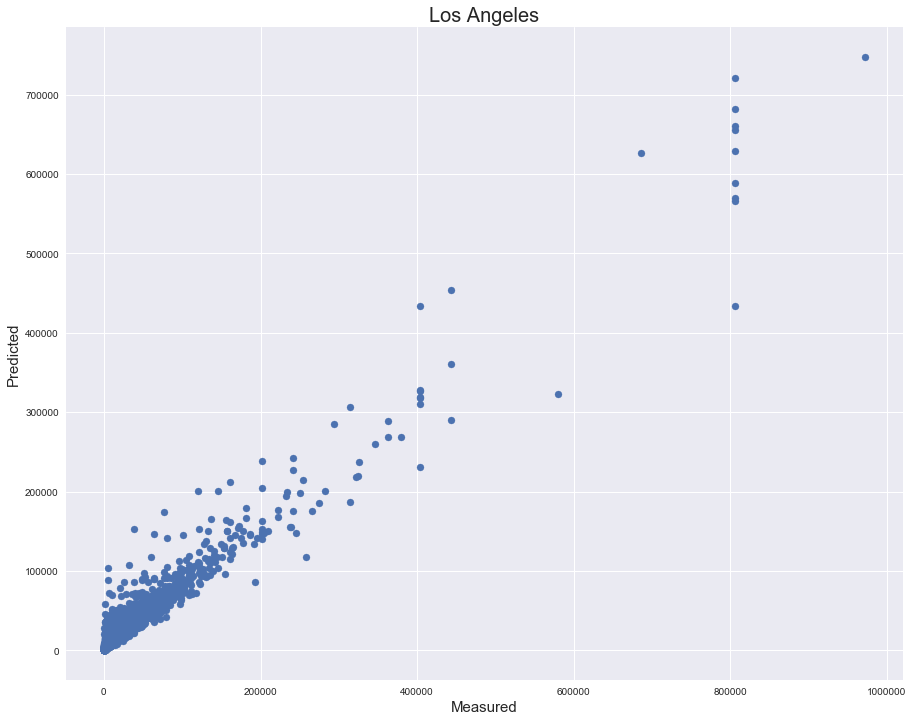

In [9]:
# Train the random forest model
forest_reg = grid_search.best_estimator_

forest_reg.fit(X_test,y_test)

# Evaluate the model
final_predictions = forest_reg.predict(X_test)

print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, final_predictions)))
print ('R-Squared: %.2f' % r2_score(y_test, final_predictions))
fig, ax = plt.subplots(figsize=(15,12))
ax.scatter(y_test, final_predictions)
ax.set_title('Los Angeles',fontsize=20)
ax.set_xlabel('Measured',fontsize=15)
ax.set_ylabel('Predicted',fontsize=15)

## Feature Importance

In [10]:
feature = grid_search.best_estimator_.feature_importances_

sol = listing.columns
sol = sol.drop('revenue')

feat = pd.DataFrame(data=feature,index=sol)
feat = feat.reset_index()

result = feat.sort_values(by=0,ascending=False)
result

,index,0
3,accommodates,0.099341
4,bathrooms,0.099283
5,bedrooms,0.092674
10,number_of_reviews,0.078933
9,maximum_nights,0.053200
8,minimum_nights,0.044564
6,beds,0.038994
2,host_total_listings_count,0.038929
0,host_response_rate,0.035610
1,host_listings_count,0.034959


** This is a well fitting model with an ok error rate. Next step is to test how this model generalizes over to different market areas **

# Generalization

## San Diego

I will score the new model on a set of data that should be somewhat similar to the Los Angeles data. San Diego is close, by the ocean, with the same weather patterns. Let's see how it generalizes.

RMSE: 23940.77
R-Squared: -0.09


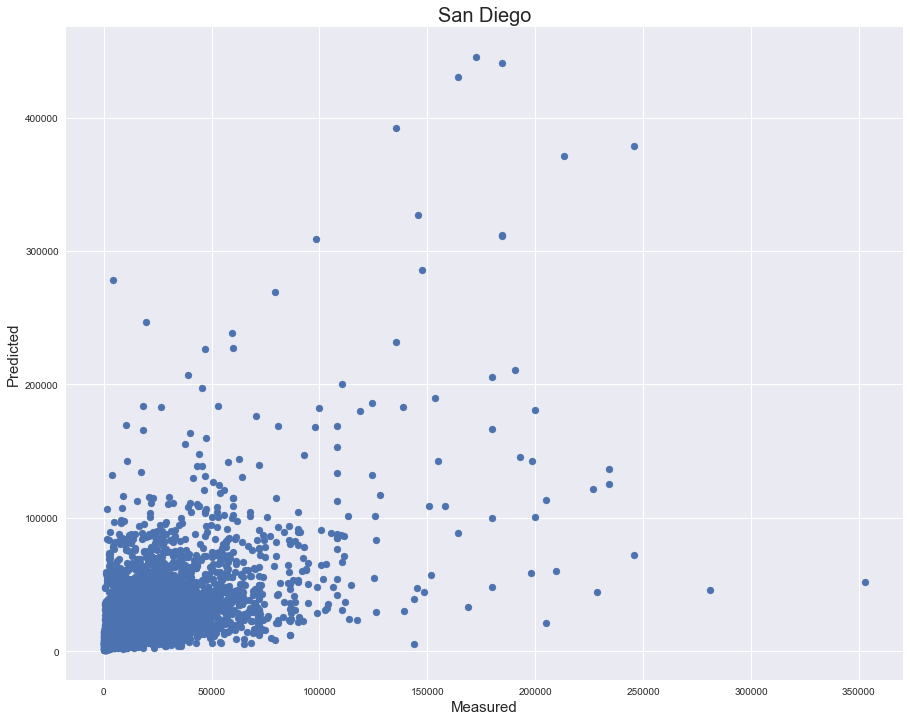

In [11]:
# Load the dataset
san_diego = pd.read_csv('cleaned_sandiego.csv')
san_diego = san_diego.drop('Unnamed: 0', axis=1)

feature, target = san_diego.drop('revenue',axis=1), san_diego['revenue']

# Evaluate the model
sd_predictions = grid_search.best_estimator_.predict(feature)

print("RMSE: %.2f" % np.sqrt(mean_squared_error(target, sd_predictions)))
print ('R-Squared: %.2f' % r2_score(target, sd_predictions))
fig, ax = plt.subplots(figsize=(15,12))
ax.scatter(target, sd_predictions)
ax.set_title('San Diego',fontsize=20)
ax.set_xlabel('Measured',fontsize=15)
ax.set_ylabel('Predicted',fontsize=15)

## Nashville
Nashville, TN is significantly a different area than the two California cities. Different weather patterns, culture, not close to the ocean. A ture test of the model

RMSE: 31937.08
R-Squared: 0.13


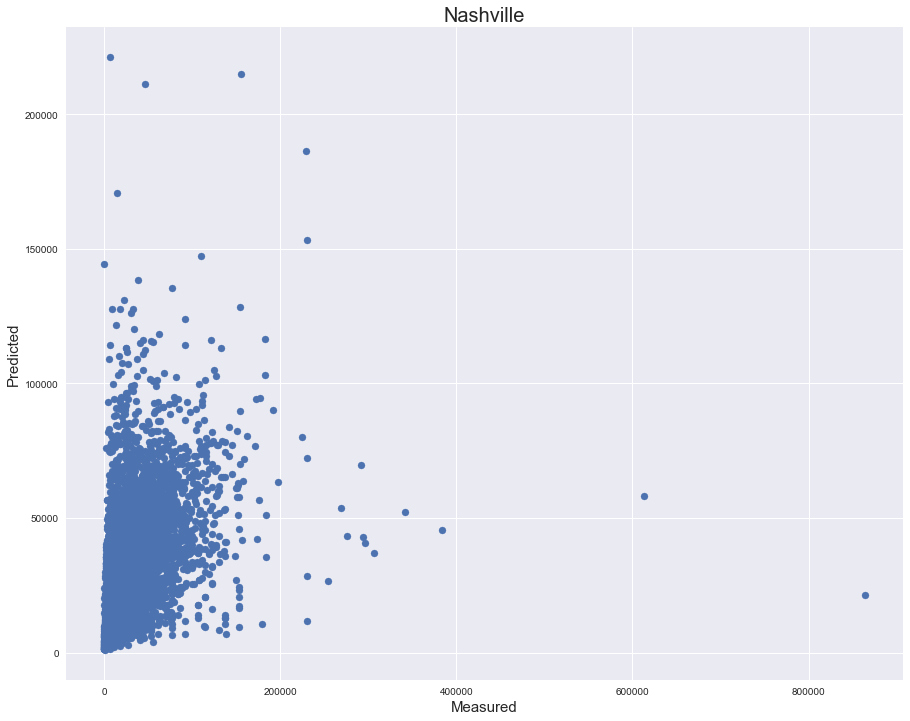

In [12]:
# Load the dataset
nash = pd.read_csv('cleaned_nashville.csv')

nash = nash.drop('Unnamed: 0', axis=1)

feature, target = nash.drop('revenue',axis=1), nash['revenue']

# Evaluate the model
nv_predictions = grid_search.best_estimator_.predict(feature)

print("RMSE: %.2f" % np.sqrt(mean_squared_error(target, nv_predictions)))
print ('R-Squared: %.2f' % r2_score(target, nv_predictions))
fig, ax = plt.subplots(figsize=(15,12))
ax.scatter(target, nv_predictions)
ax.set_title('Nashville',fontsize=20)
ax.set_xlabel('Measured',fontsize=15)
ax.set_ylabel('Predicted',fontsize=15)

## London


RMSE: 14440.09
R-Squared: -0.71


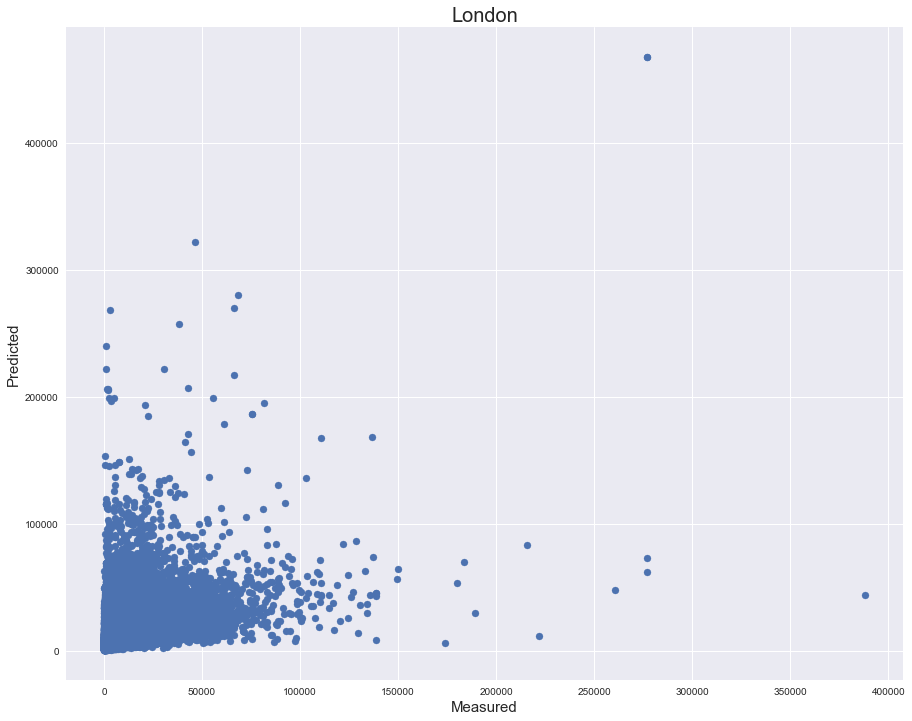

In [13]:
# Load the dataset
london = pd.read_csv('cleaned_london.csv')
london = london.drop('Unnamed: 0', axis=1)

feature, target = london.drop('revenue',axis=1), london['revenue']

# Evaluate the model
london_predictions = grid_search.best_estimator_.predict(feature)

print("RMSE: %.2f" % np.sqrt(mean_squared_error(target, london_predictions)))
print ('R-Squared: %.2f' % r2_score(target, london_predictions))
fig, ax = plt.subplots(figsize=(15,12))
ax.scatter(target, london_predictions)
ax.set_title('London',fontsize=20)
ax.set_xlabel('Measured',fontsize=15)
ax.set_ylabel('Predicted',fontsize=15)

** The model itself doesn't generalize well in all cities. It would be interesting to see how a model would look with all listings worldwide **

In [14]:
from sklearn.model_selection import learning_curve

<module 'matplotlib.pyplot' from 'C:\\Users\\peril\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

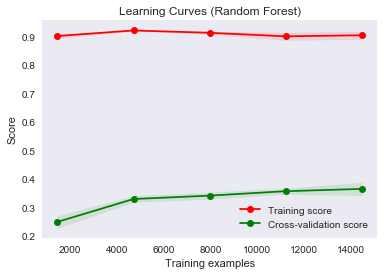

In [15]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



X, y = X_train,y_train


title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

estimator = grid_search.best_estimator_
plot_learning_curve(estimator, title, X, y, n_jobs=4)

<module 'matplotlib.pyplot' from 'C:\\Users\\peril\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

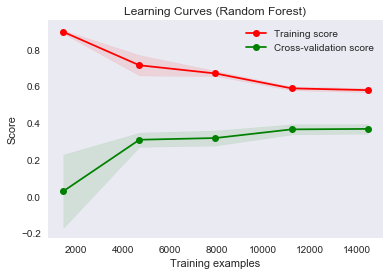

In [16]:
estimator = GradientBoostingRegressor()
plot_learning_curve(estimator, title, X, y, n_jobs=4)

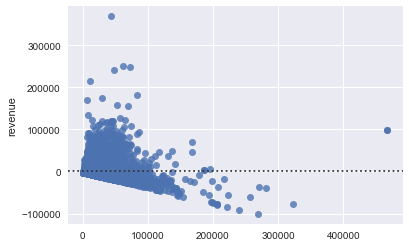

In [17]:
sns.residplot(x=london_predictions,y=target)